In [1]:
# ============================
# 1️. Import Libraries & Load Data
# ============================
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import random

# Define image size and directories
IMG_SIZE = (224, 224)
TRAIN_DIR = 'dataset/train'
TEST_DIR = 'dataset/test'


In [2]:
# ============================
# 2️ Create Data Generators with Validation Split
# ============================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # 10% for validation
)

train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Test data for final evaluation
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)


Found 1529 images belonging to 5 classes.
Found 168 images belonging to 5 classes.
Found 437 images belonging to 5 classes.


In [30]:
# ============================
# 3️. Build the CNN Model
# ============================
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Learning rate reduction callback
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)


c:\Users\USER\Desktop\Rice Disease Detection\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,279,109 (84.99 MB)

 Trainable params: 22,278,661 (84.99 MB)

 Non-trainable params: 448 (1.75 KB)

In [32]:
# ============================
# 4️. Train the CNN Model
# ============================
epochs = 25
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data = val_data,
    callbacks=[lr_reduction])

Epoch 1/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 608s 10s/step - accuracy: 0.5880 - loss: 2.1990 - val_accuracy: 0.0179 - val_loss: 6.8260 - learning_rate: 1.0000e-04
Epoch 2/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 399s 8s/step - accuracy: 0.6887 - loss: 1.4077 - val_accuracy: 0.0179 - val_loss: 10.5046 - learning_rate: 1.0000e-04
Epoch 3/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 410s 9s/step - accuracy: 0.7397 - loss: 0.9382 - val_accuracy: 0.0179 - val_loss: 9.4150 - learning_rate: 1.0000e-04
Epoch 4/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 415s 9s/step - accuracy: 0.7534 - loss: 0.8169 - val_accuracy: 0.1607 - val_loss: 5.1477 - learning_rate: 1.0000e-04
Epoch 5/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 414s 9s/step - accuracy: 0.7744 - loss: 0.7079 - val_accuracy: 0.3393 - val_loss: 3.9243 - learning_rate: 1.0000e-04
Epoch 6/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 411s 9s/step - accuracy: 0.7907 - loss: 0.6593 - val_accuracy: 0.3988 - val_loss: 2.7251 - learning_rate: 1.0000e-04
Epoch 7/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 425s 9s/step - accuracy: 0.814

In [34]:
# ============================
# 6️. Evaluate on Test Data
# ============================
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9199 - loss: 0.4000
Test Loss: 0.4000
Test Accuracy: 0.9199


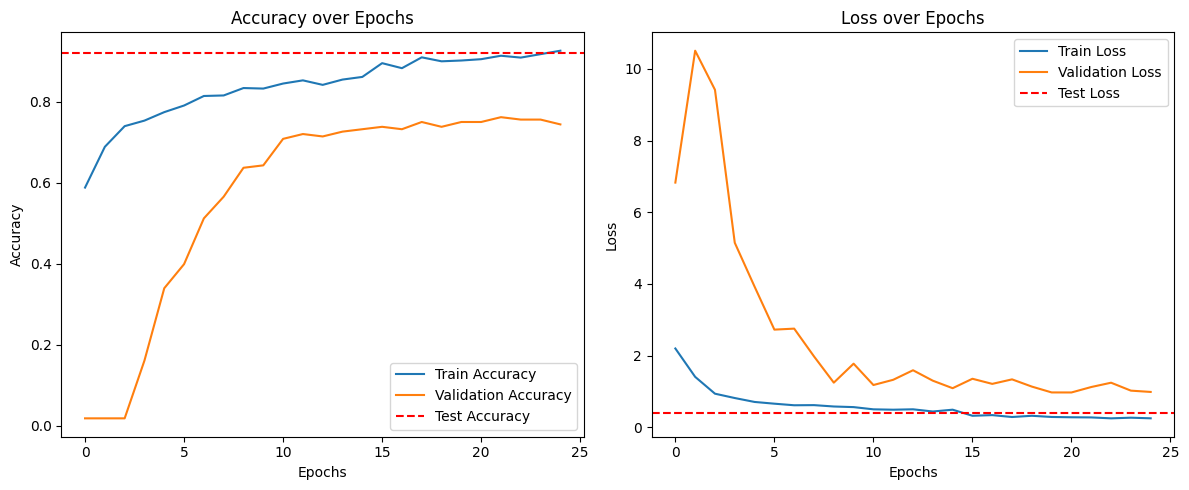

In [36]:
# 7️. Plot Training & Validation History + Test Error
# ============================
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()

In [38]:
# ============================
# 7️. Save the Model
# ============================
model.save("rice_disease_cnn_model_v2.h5", include_optimizer=False)
print("Model training complete and saved as 'rice_disease_cnn_model.h5'")


Model training complete and saved as 'rice_disease_cnn_model.h5'
